## Prediction of Customer Churn
In this project, we aim to predict customer churn using various features such as payment methods, contract type, and whether a customer streams TV or movies. This task is crucial for companies to identify potential 'churners' and take actions to retain them

### 1. Import Necessary Libraries

In [1]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### 2. Load Data

In [2]:
df = pd.read_csv(r"c:\Users\banji\Downloads\Churn.csv")

### 3. Exploratory Data Analysis

In [3]:
df.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [4]:
print(f"This is the shape of the data {df.shape}")
print()
print(df.info())

This is the shape of the data (7044, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7044 non-null   object 
 1   Gender             7044 non-null   object 
 2   Senior Citizen     7044 non-null   int64  
 3   Partner            7044 non-null   object 
 4   Dependents         7044 non-null   object 
 5   tenure             7044 non-null   int64  
 6   Phone Service      7044 non-null   object 
 7   Multiple Lines     7044 non-null   object 
 8   Internet Service   7044 non-null   object 
 9   Online Security    7044 non-null   object 
 10  Online Backup      7044 non-null   object 
 11  Device Protection  7044 non-null   object 
 12  Tech Support       7044 non-null   object 
 13  Streaming TV       7044 non-null   object 
 14  Streaming Movies   7044 non-null   object 
 15  Contract           7044 non-nu

In [5]:
df.describe()

,Senior Citizen,tenure,Monthly Charges
count,7044.000000,7044.000000,7044.000000
mean,0.162124,32.366695,64.756736
std,0.368590,24.560582,30.090786
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
print(f"This is the number of duplicate entries {df.duplicated().sum()}")
print()
print(f"This is the number of null entries\n{df.isna().sum()}")



This is the number of duplicate entries 0

This is the number of null entries
Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64


In [7]:
df.columns

Index(['Customer ID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [8]:
def plot_barh(column_name):
    count = df[column_name].value_counts()
    #print(count)
    count.plot(kind = 'barh')
    return plt.show()
    

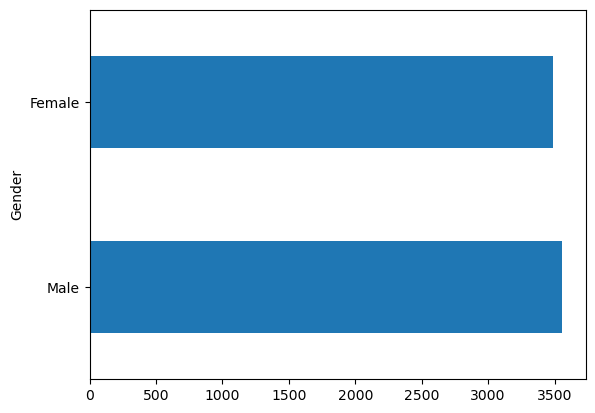

None


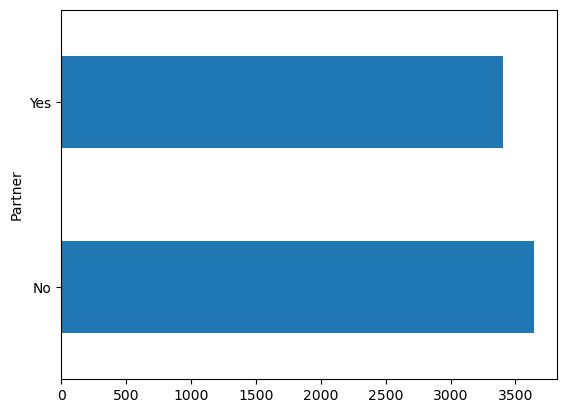

None


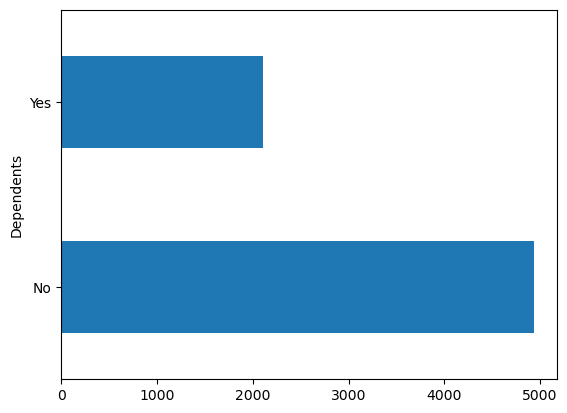

None


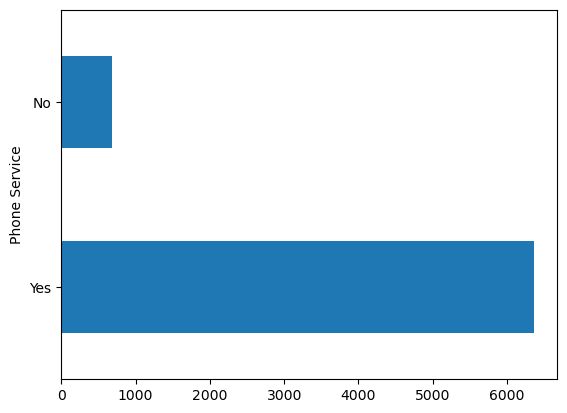

None


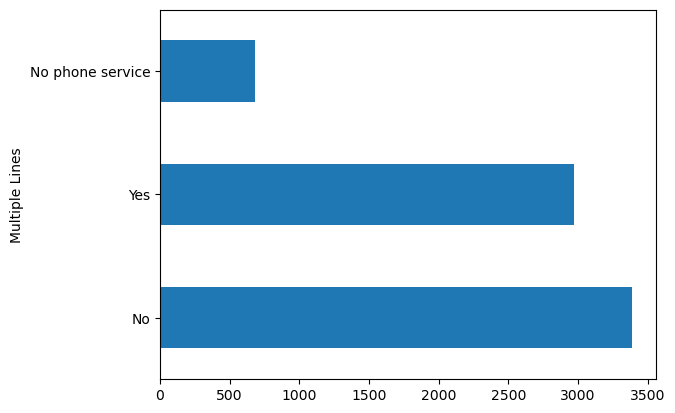

None


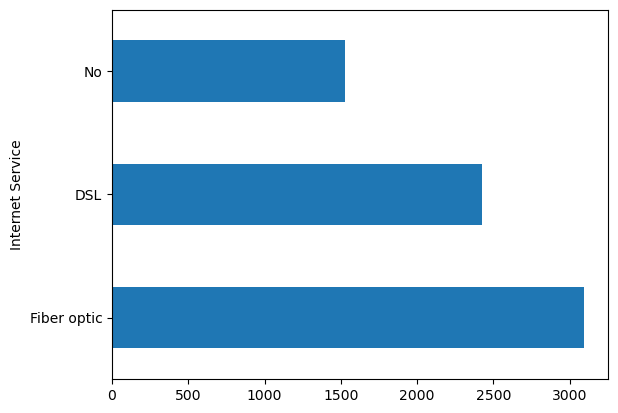

None


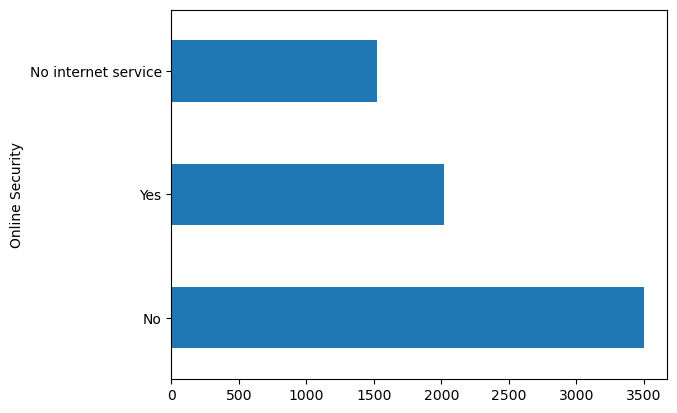

None


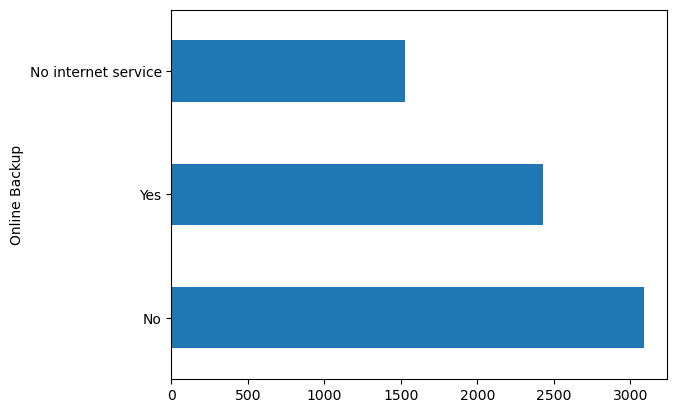

None


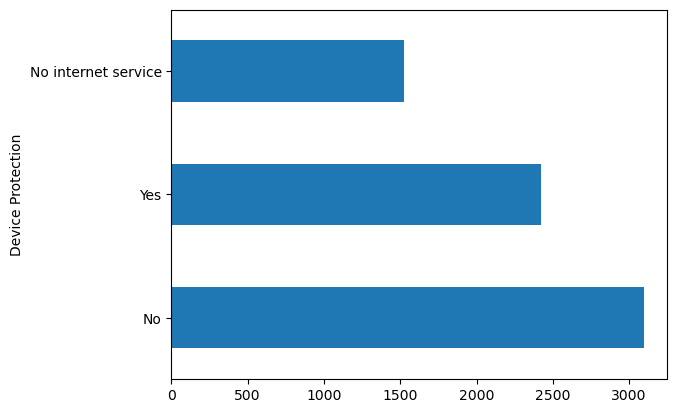

None


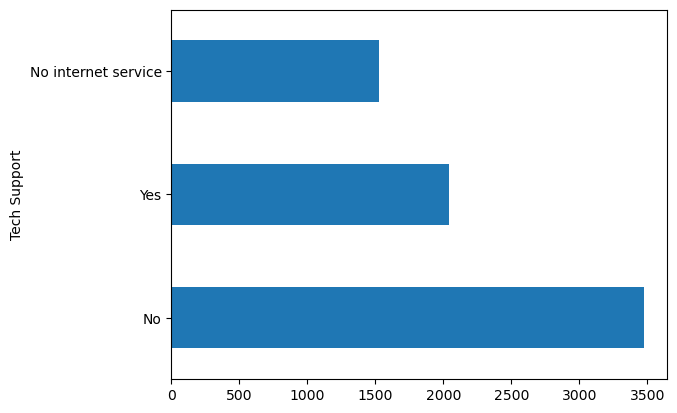

None


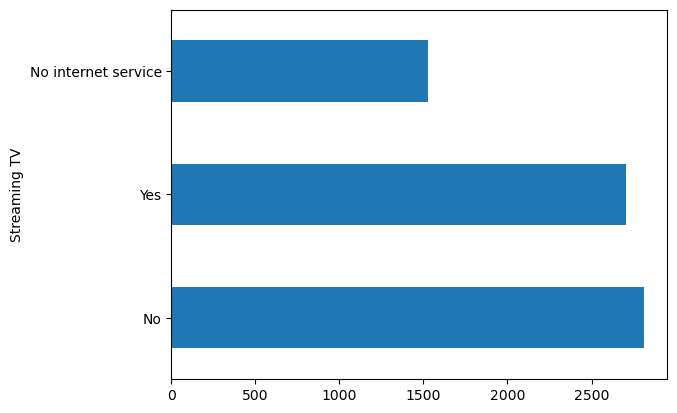

None


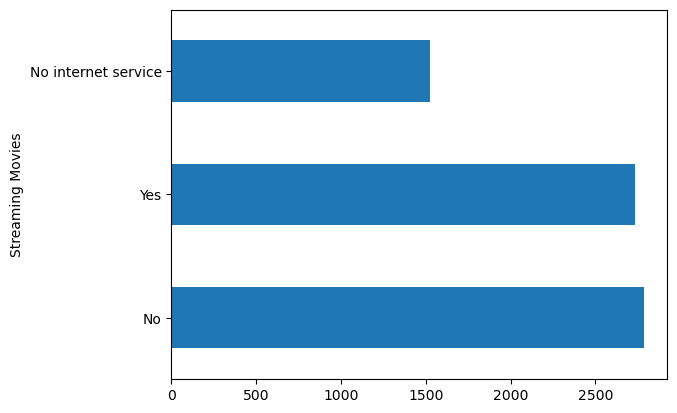

None


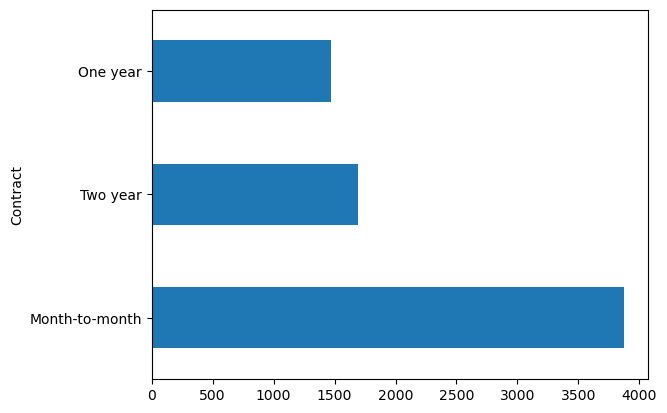

None


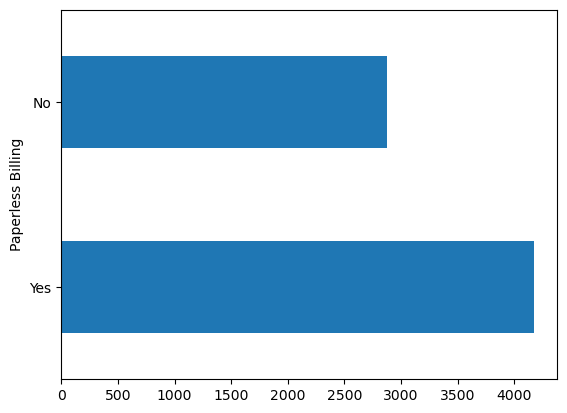

None


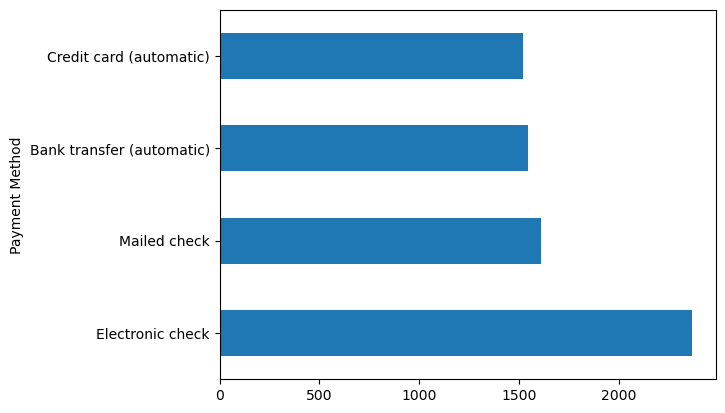

None


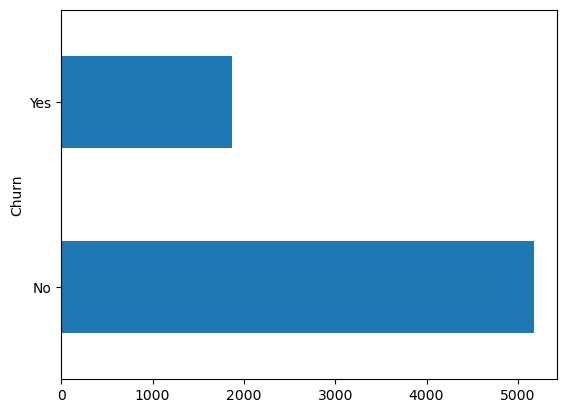

None


In [9]:
categorical_columns = ['Gender', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Churn']

for i in categorical_columns:
    print(plot_barh(i))
    #plt.show()

### 4.Data Cleaning and preparation

In [10]:
df.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


#### 4.1 One Hot Encoding

In [11]:
## For one hot encoding we will use pd.get_dummies()
#Columns to be encoded using one hot encoding (pd.get_dummies())
oh_encode = ["Multiple Lines", "Internet Service","Online Security","Online Backup",
            "Device Protection","Tech Support", "Streaming TV","Streaming Movies",
            "Contract","Payment Method"] 

encoded_df = pd.get_dummies(data= df, columns= oh_encode, dtype= int)
encoded_df.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Paperless Billing,Monthly Charges,Total Charges,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,7590-VHVEA,Female,0,Yes,No,1,No,Yes,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,7590-VHVEG,Female,0,Yes,No,1,No,Yes,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
2,5575-GNVDE,Male,0,No,No,34,Yes,No,56.95,1889.5,...,1,0,0,0,1,0,0,0,0,1
3,3668-QPYBK,Male,0,No,No,2,Yes,Yes,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
4,7795-CFOCW,Male,0,No,No,45,No,No,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0


#### 4.2 Label Encoding

In [12]:
## For label encoding we will use label encoder
#columns to be label encoded
lab_encode = ["Gender", "Partner", "Dependents", "Phone Service","Paperless Billing"]

le = LabelEncoder()
for column_name in lab_encode:
    encoded_df[column_name +" lab_encoded"] = le.fit_transform(encoded_df[column_name])
    encoded_df.drop(column_name, axis=1, inplace = True)


encoded_df.head()


,Customer ID,Senior Citizen,tenure,Monthly Charges,Total Charges,Churn,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,...,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Gender lab_encoded,Partner lab_encoded,Dependents lab_encoded,Phone Service lab_encoded,Paperless Billing lab_encoded
0,7590-VHVEA,0,1,29.85,29.85,No,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
1,7590-VHVEG,0,1,29.85,29.85,No,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
2,5575-GNVDE,0,34,56.95,1889.5,No,1,0,0,1,...,0,0,0,0,1,1,0,0,1,0
3,3668-QPYBK,0,2,53.85,108.15,Yes,1,0,0,1,...,0,0,0,0,1,1,0,0,1,1
4,7795-CFOCW,0,45,42.30,1840.75,No,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0


In [13]:
df["Senior Citizen"].value_counts()

Senior Citizen
0    5902
1    1142
Name: count, dtype: int64

In [14]:
numerical_columns = ['tenure','Monthly Charges','Total Charges']
encoded_df[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7044 non-null   int64  
 1   Monthly Charges  7044 non-null   float64
 2   Total Charges    7044 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 165.2+ KB


In [15]:
#Total Charges is stored as an object and on further exploration, it contained empty(not null) strings
encoded_df[encoded_df['Total Charges'].str.contains(' ', na=False)]

,Customer ID,Senior Citizen,tenure,Monthly Charges,Total Charges,Churn,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,...,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Gender lab_encoded,Partner lab_encoded,Dependents lab_encoded,Phone Service lab_encoded,Paperless Billing lab_encoded
489,4472-LVYGI,0,0,52.55,,No,0,1,0,1,...,1,1,0,0,0,0,1,1,0,1
754,3115-CZMZD,0,0,20.25,,No,1,0,0,0,...,1,0,0,0,1,1,0,1,1,0
937,5709-LVOEQ,0,0,80.85,,No,1,0,0,1,...,1,0,0,0,1,0,1,1,1,0
1083,4367-NUYAO,0,0,25.75,,No,0,0,1,0,...,1,0,0,0,1,1,1,1,1,0
1341,1371-DWPAZ,0,0,56.05,,No,0,1,0,1,...,1,0,1,0,0,0,1,1,0,0
3332,7644-OMVMY,0,0,19.85,,No,1,0,0,0,...,1,0,0,0,1,1,1,1,1,0
3827,3213-VVOLG,0,0,25.35,,No,0,0,1,0,...,1,0,0,0,1,1,1,1,1,0
4381,2520-SGTTA,0,0,20.00,,No,1,0,0,0,...,1,0,0,0,1,0,1,1,1,0
5219,2923-ARZLG,0,0,19.70,,No,1,0,0,0,...,0,0,0,0,1,1,1,1,1,1
6671,4075-WKNIU,0,0,73.35,,No,0,0,1,1,...,1,0,0,0,1,0,1,1,1,0


In [16]:
#We will exclude entries in our data
encoded_df = encoded_df[~encoded_df['Total Charges'].str.contains(' ', na=False)].copy()
encoded_df.head()

,Customer ID,Senior Citizen,tenure,Monthly Charges,Total Charges,Churn,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,...,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Gender lab_encoded,Partner lab_encoded,Dependents lab_encoded,Phone Service lab_encoded,Paperless Billing lab_encoded
0,7590-VHVEA,0,1,29.85,29.85,No,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
1,7590-VHVEG,0,1,29.85,29.85,No,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
2,5575-GNVDE,0,34,56.95,1889.5,No,1,0,0,1,...,0,0,0,0,1,1,0,0,1,0
3,3668-QPYBK,0,2,53.85,108.15,Yes,1,0,0,1,...,0,0,0,0,1,1,0,0,1,1
4,7795-CFOCW,0,45,42.30,1840.75,No,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0


#### 4.3 Scaling of Numerical Columns

In [17]:
scaler = StandardScaler()
encoded_df[numerical_columns] = scaler.fit_transform(encoded_df[numerical_columns])

encoded_df.head()

,Customer ID,Senior Citizen,tenure,Monthly Charges,Total Charges,Churn,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,...,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Gender lab_encoded,Partner lab_encoded,Dependents lab_encoded,Phone Service lab_encoded,Paperless Billing lab_encoded
0,7590-VHVEA,0,-1.280008,-1.161500,-0.994054,No,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
1,7590-VHVEG,0,-1.280008,-1.161500,-0.994054,No,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
2,5575-GNVDE,0,0.064482,-0.260706,-0.173599,No,1,0,0,1,...,0,0,0,0,1,1,0,0,1,0
3,3668-QPYBK,0,-1.239266,-0.363749,-0.959509,Yes,1,0,0,1,...,0,0,0,0,1,1,0,0,1,1
4,7795-CFOCW,0,0.512645,-0.747667,-0.195107,No,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0


### 5 Feature Selection

In [18]:
X= encoded_df.drop(columns= ["Churn","Customer ID"])
y = LabelEncoder().fit_transform(encoded_df['Churn'])

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size= 0.7, random_state= 70) 

### 6. Selection of Models

#### 6A. Application of Machine Learning Models
1. Logistic Regression
2. Support Vector Machines

##### 1. Logistic Regression

0.8052132701421801

The classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1553
           1       0.65      0.57      0.61       557

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



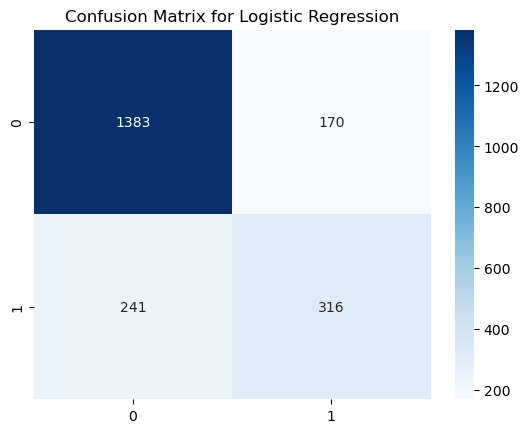

In [22]:
lr = LogisticRegression(random_state= 70)
lr.fit(X_train, y_train)
y_hat1 = lr.predict(X_test)

#Evaluation Metrics
print(accuracy_score(y_test,y_hat1))
print()
print("The classification report for Logistic Regression:")
print(classification_report(y_test, y_hat1))

#plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_hat1), annot= True, cmap="Blues", fmt ='d')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


##### 2. Support Vector Machine

Accuracy: 0.7990521327014218

The classification report for Logisitic Regression               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1553
           1       0.64      0.55      0.59       557

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



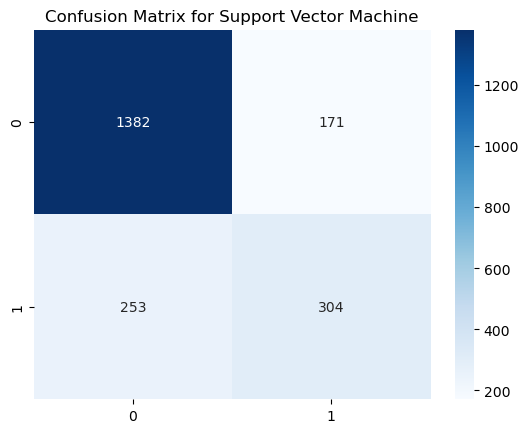

In [23]:
svm = SVC(kernel= 'linear', random_state= 70)

svm.fit(X_train, y_train)
y_hat2 = svm.predict(X_test)

#Evaluation Metrics
print(f"Accuracy: {accuracy_score(y_test, y_hat2)}")
print()
print(f"The classification report for Logisitic Regression {classification_report(y_test, y_hat2)}")

#confusion matrix
sns.heatmap(confusion_matrix(y_test, y_hat2), annot= True, cmap="Blues", fmt ='d')
plt.title("Confusion Matrix for Support Vector Machine")
plt.show()


### 6B. Deep Learning Model

#### Feedforward Neural Network (FNN)

In [25]:
tf.random.set_seed(70)

model = Sequential([
    Dense(units = 32, activation='relu', input_dim = len(X_train.columns)),
    Dense(units = 64, activation= 'relu'),
    Dense(units=1, activation= 'sigmoid'),
])

model.summary()

c:\Users\banji\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,489 (13.63 KB)

 Trainable params: 3,489 (13.63 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=["recall"])

model.fit(X_train, y_train, epochs= 200)
y_hat3 = model.predict(X_test)

Epoch 1/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5044 - recall: 0.2806
Epoch 2/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4234 - recall: 0.5110
Epoch 3/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4171 - recall: 0.5197
Epoch 4/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4136 - recall: 0.5215
Epoch 5/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4110 - recall: 0.5265
Epoch 6/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4089 - recall: 0.5293
Epoch 7/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4069 - recall: 0.5255
Epoch 8/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4052 - recall: 0.5203
Epoch 9/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4034 - recall: 0.5217
Epoch 10/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4018 - recall: 0.5297
Epoch 11/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4002 - recall: 0.5276
Epoch 12/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0

In [27]:
#convert probabilities into categories with 0.5 as the threshold 
y_hat3 =[1 if x>0.5 else 0 for x in y_hat3] 

Accuracy: 0.7412322274881517

The classification report for Feedforward Neural Network
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1553
           1       0.51      0.54      0.52       557

    accuracy                           0.74      2110
   macro avg       0.67      0.68      0.67      2110
weighted avg       0.75      0.74      0.74      2110



Text(0.5, 1.0, 'Confusion Matrix for Feedforward Neural Network')

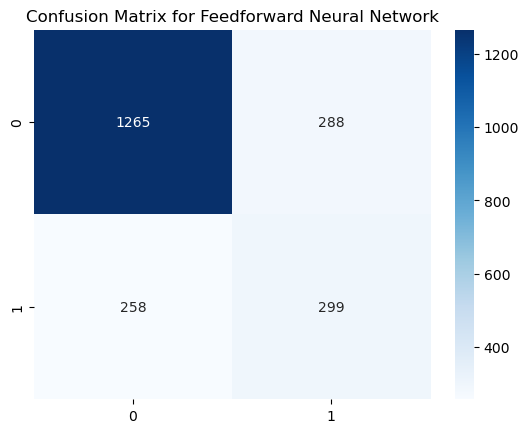

In [28]:
print
print(f"Accuracy: {accuracy_score(y_test, y_hat3)}")
print()
print("The classification report for Feedforward Neural Network")
print(classification_report(y_test, y_hat3))


#Plot confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_hat3), annot = True, cmap= 'Blues', fmt= 'd')
plt.title("Confusion Matrix for Feedforward Neural Network")